In [1]:
from __future__ import (absolute_import, division, print_function,unicode_literals)

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
from pylab import rcParams
rcParams['figure.figsize'] =8,5
import pandas as pd
import seaborn as sns

In [4]:
df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv').dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
Name               6825 non-null object
Platform           6825 non-null object
Year_of_Release    6825 non-null float64
Genre              6825 non-null object
Publisher          6825 non-null object
NA_Sales           6825 non-null float64
EU_Sales           6825 non-null float64
JP_Sales           6825 non-null float64
Other_Sales        6825 non-null float64
Global_Sales       6825 non-null float64
Critic_Score       6825 non-null float64
Critic_Count       6825 non-null float64
User_Score         6825 non-null object
User_Count         6825 non-null float64
Developer          6825 non-null object
Rating             6825 non-null object
dtypes: float64(9), object(7)
memory usage: 906.4+ KB


In [5]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


In [6]:
df['User_Score'] = df.User_Score.astype('float64')
df['Year_of_Release'] = df.Year_of_Release.astype('int64')
df['User_Count'] = df.User_Count.astype('int64')
df['Critic_Count'] = df.Critic_Count.astype('int64')

In [7]:
print(df.shape)

(6825, 16)


In [8]:
useful_cols = ['Name', 'Platform','Year_of_Release', 'Genre', 'Global_Sales', 'Critic_Score', 
               'Critic_Count','User_Score', 'User_Count', 'Rating']
df[useful_cols].head()

,Name,Platform,Year_of_Release,Genre,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006,Sports,82.53,76.0,51,8.0,322,E
2,Mario Kart Wii,Wii,2008,Racing,35.52,82.0,73,8.3,709,E
3,Wii Sports Resort,Wii,2009,Sports,32.77,80.0,73,8.0,192,E
6,New Super Mario Bros.,DS,2006,Platform,29.80,89.0,65,8.5,431,E
7,Wii Play,Wii,2006,Misc,28.92,58.0,41,6.6,129,E


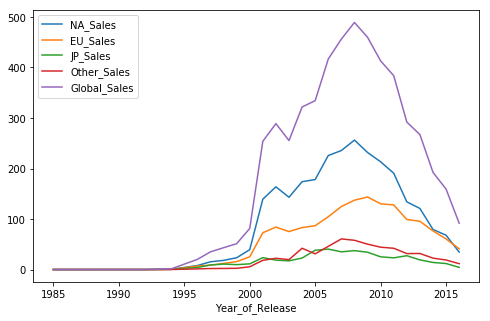

In [9]:
sales_df=df[[x for x in df.columns if 'Sales' in x] + ['Year_of_Release']]
sales_df.groupby('Year_of_Release').sum().plot()

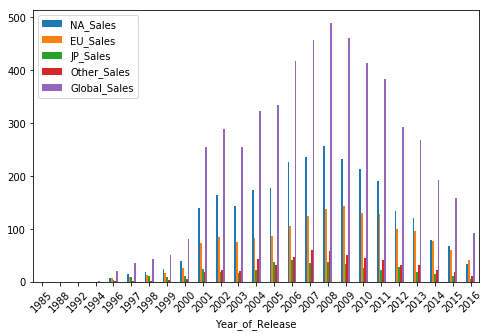

In [10]:
sales_df.groupby('Year_of_Release').sum().plot(kind='bar', rot=45)

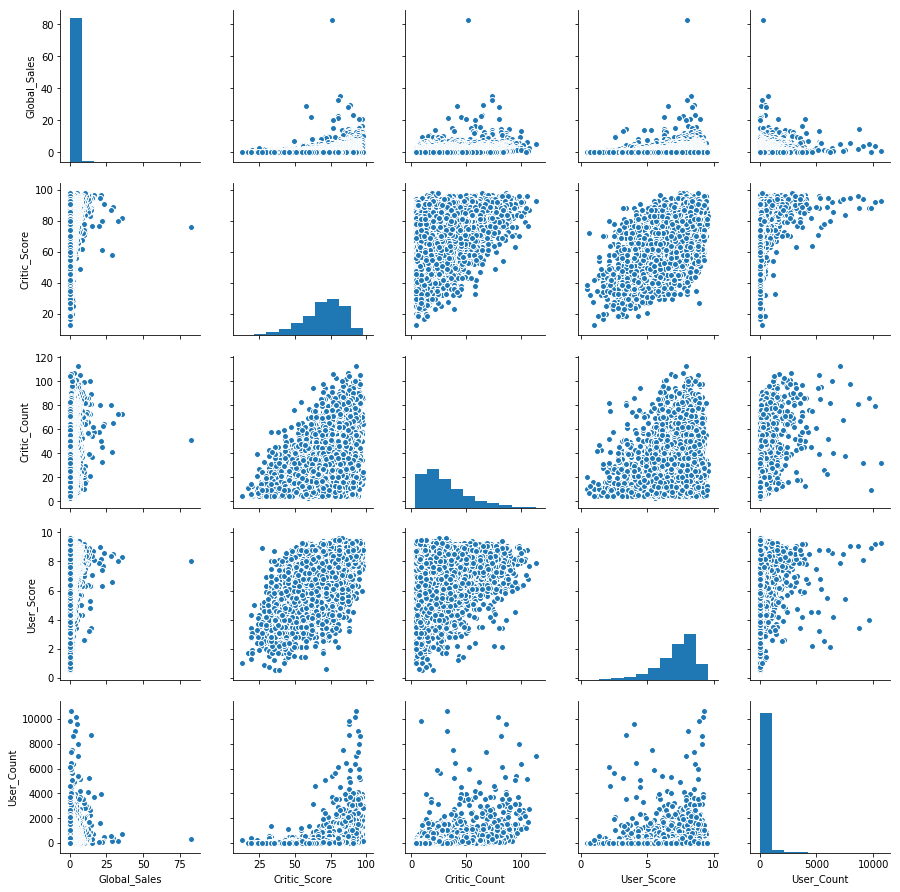

In [11]:
cols = ['Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']
sns_plot = sns.pairplot(df[cols])
sns_plot.savefig('pairplot.png')

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


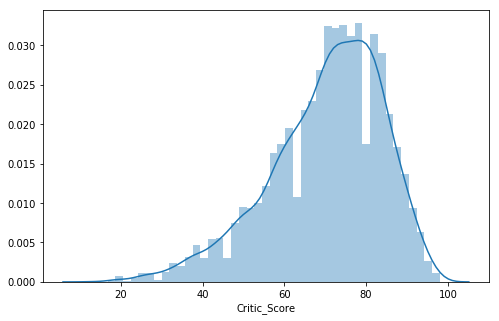

In [12]:
sns.distplot(df.Critic_Score)

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


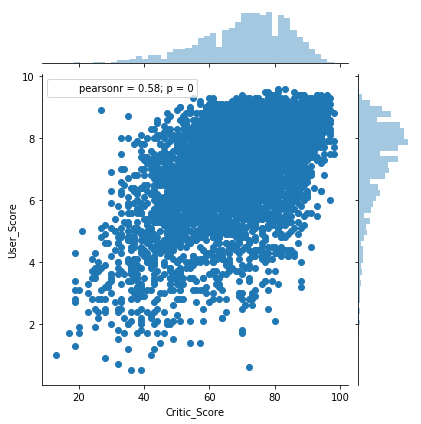

In [13]:
sns.jointplot(x='Critic_Score', y='User_Score', data=df)

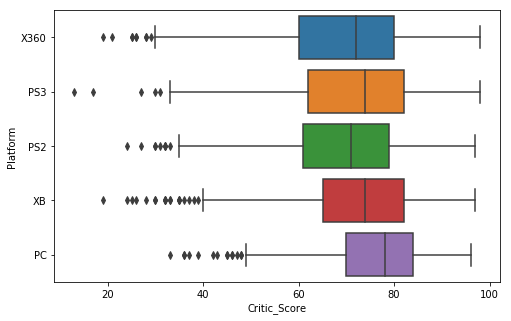

In [14]:
top_platform = df.Platform.value_counts().sort_values(ascending = False).head(5).index.values
sns.boxplot(x='Critic_Score', y = 'Platform', data = df[df.Platform.isin(top_platform)], orient = 'h')

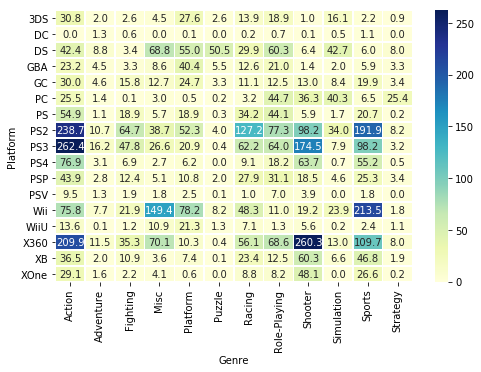

In [15]:
platform_genre_sales=df.pivot_table(index='Platform', columns='Genre', values = 'Global_Sales', 
                                    aggfunc = sum).fillna(0).applymap(float)
sns.heatmap(platform_genre_sales, annot = True, fmt='.1f', linewidths=.5, cmap="YlGnBu")

In [16]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go

In [17]:
years_df = df.groupby('Year_of_Release')[['Global_Sales']].sum().join(df.groupby('Year_of_Release')[['Name']].count())
years_df.columns = ['Global_Sales', 'Number_of_Games']
trace0 = go.Scatter(x = years_df.index, y = years_df.Global_Sales, name = 'Global Sales')
trace1 = go.Scatter(x = years_df.index, y = years_df.Number_of_Games, name = 'Number of games released')
data = [trace0, trace1]
layout = {'title':'Statistics of video games'}
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

In [18]:
plotly.offline.plot(fig, filename='years_stats.html',show_link = False)

'file:///Users/rzs/Documents/Natasha work folder/ODS Course/years_stats.html'

In [19]:
platforms_df =df.groupby('Platform')[['Global_Sales']].sum().join(df.groupby('Platform')[['Name']].count()) 
platforms_df.columns = ['Global_Sales', 'Number_of_Games']
platforms_df.sort_values('Global_Sales', ascending = False, inplace = True)
trace0 = go.Bar(x = platforms_df.index, y = platforms_df.Global_Sales, name = 'Global Sales')
trace1 = go.Bar(x = platforms_df.index, y = platforms_df.Number_of_Games, name = 'Number of games released')
data = [trace0, trace1]
layout = {'title':'Share of platforms', 'xaxis':{'title':'platform'}}
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link = False)

In [20]:
plotly.offline.plot(fig, filename = 'Share_platf.html', show_link = False)

'file:///Users/rzs/Documents/Natasha work folder/ODS Course/Share_platf.html'

In [21]:
data=[]
for genre in df.Genre.unique():
    data.append(go.Box(y = df[df.Genre==genre].Critic_Score, name=genre))
iplot(data, show_link = False)
plotly.offline.plot(data, filename = 'Box_genre.html', show_link = False)

'file:///Users/rzs/Documents/Natasha work folder/ODS Course/Box_genre.html'

In [22]:
#Пример визуального анализа
df = pd.read_csv('telecom_churn.csv')
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [23]:
df.shape

(3333, 20)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
State                     3333 non-null object
Account length            3333 non-null int64
Area code                 3333 non-null int64
International plan        3333 non-null object
Voice mail plan           3333 non-null object
Number vmail messages     3333 non-null int64
Total day minutes         3333 non-null float64
Total day calls           3333 non-null int64
Total day charge          3333 non-null float64
Total eve minutes         3333 non-null float64
Total eve calls           3333 non-null int64
Total eve charge          3333 non-null float64
Total night minutes       3333 non-null float64
Total night calls         3333 non-null int64
Total night charge        3333 non-null float64
Total intl minutes        3333 non-null float64
Total intl calls          3333 non-null int64
Total intl charge         3333 non-null float64
Customer service calls    3333 non-null int64


In [26]:
df['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

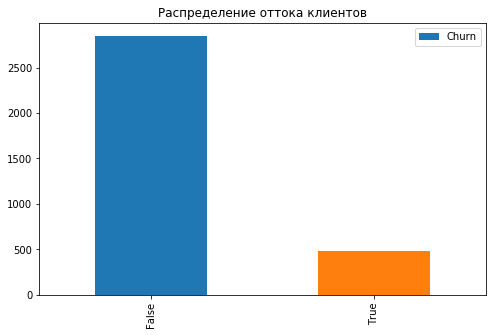

In [29]:
df['Churn'].value_counts().plot(kind='bar', label='Churn')
plt.legend()
plt.title('Распределение оттока клиентов');

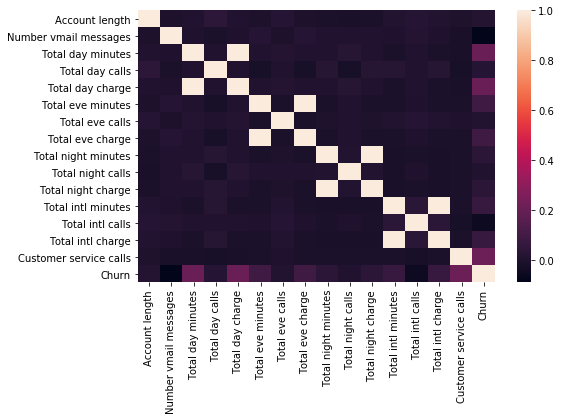

In [31]:
corr_matrix = df.drop(['State', 'International plan', 'Voice mail plan', 'Area code'], axis=1).corr()
sns.heatmap(corr_matrix);

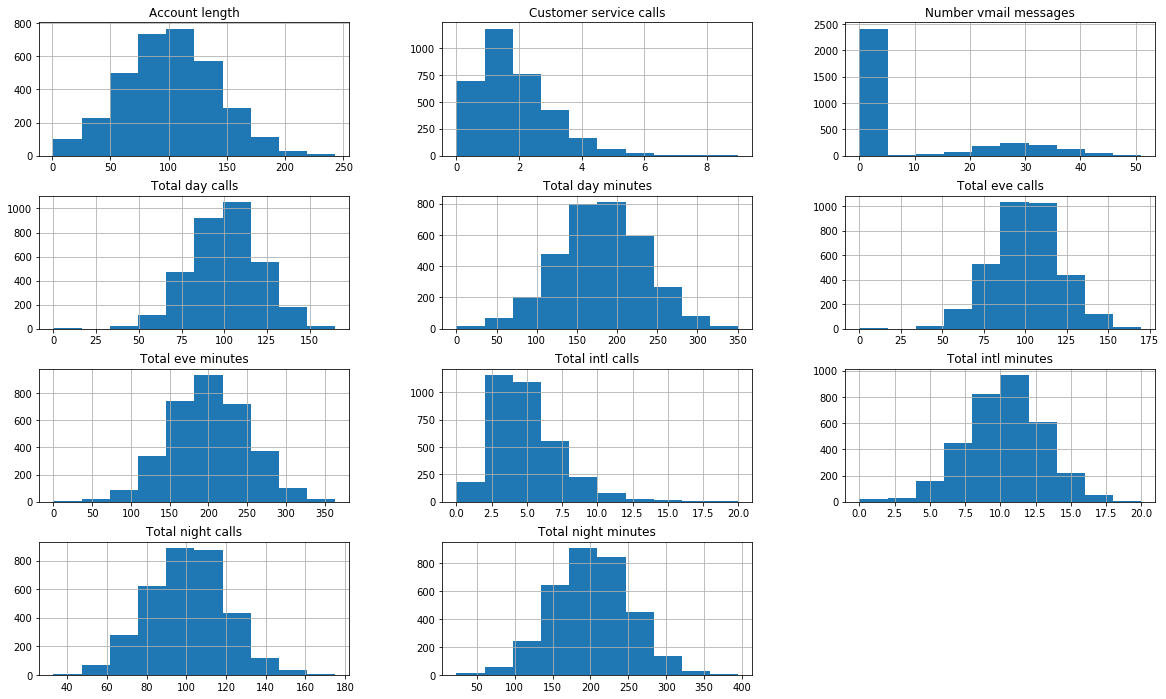

In [32]:
features = list(set(df.columns) - set(['State', 'International plan', 'Voice mail plan',  'Area code',
                                      'Total day charge',   'Total eve charge',   'Total night charge',
                                        'Total intl charge', 'Churn']))

df[features].hist(figsize=(20,12));

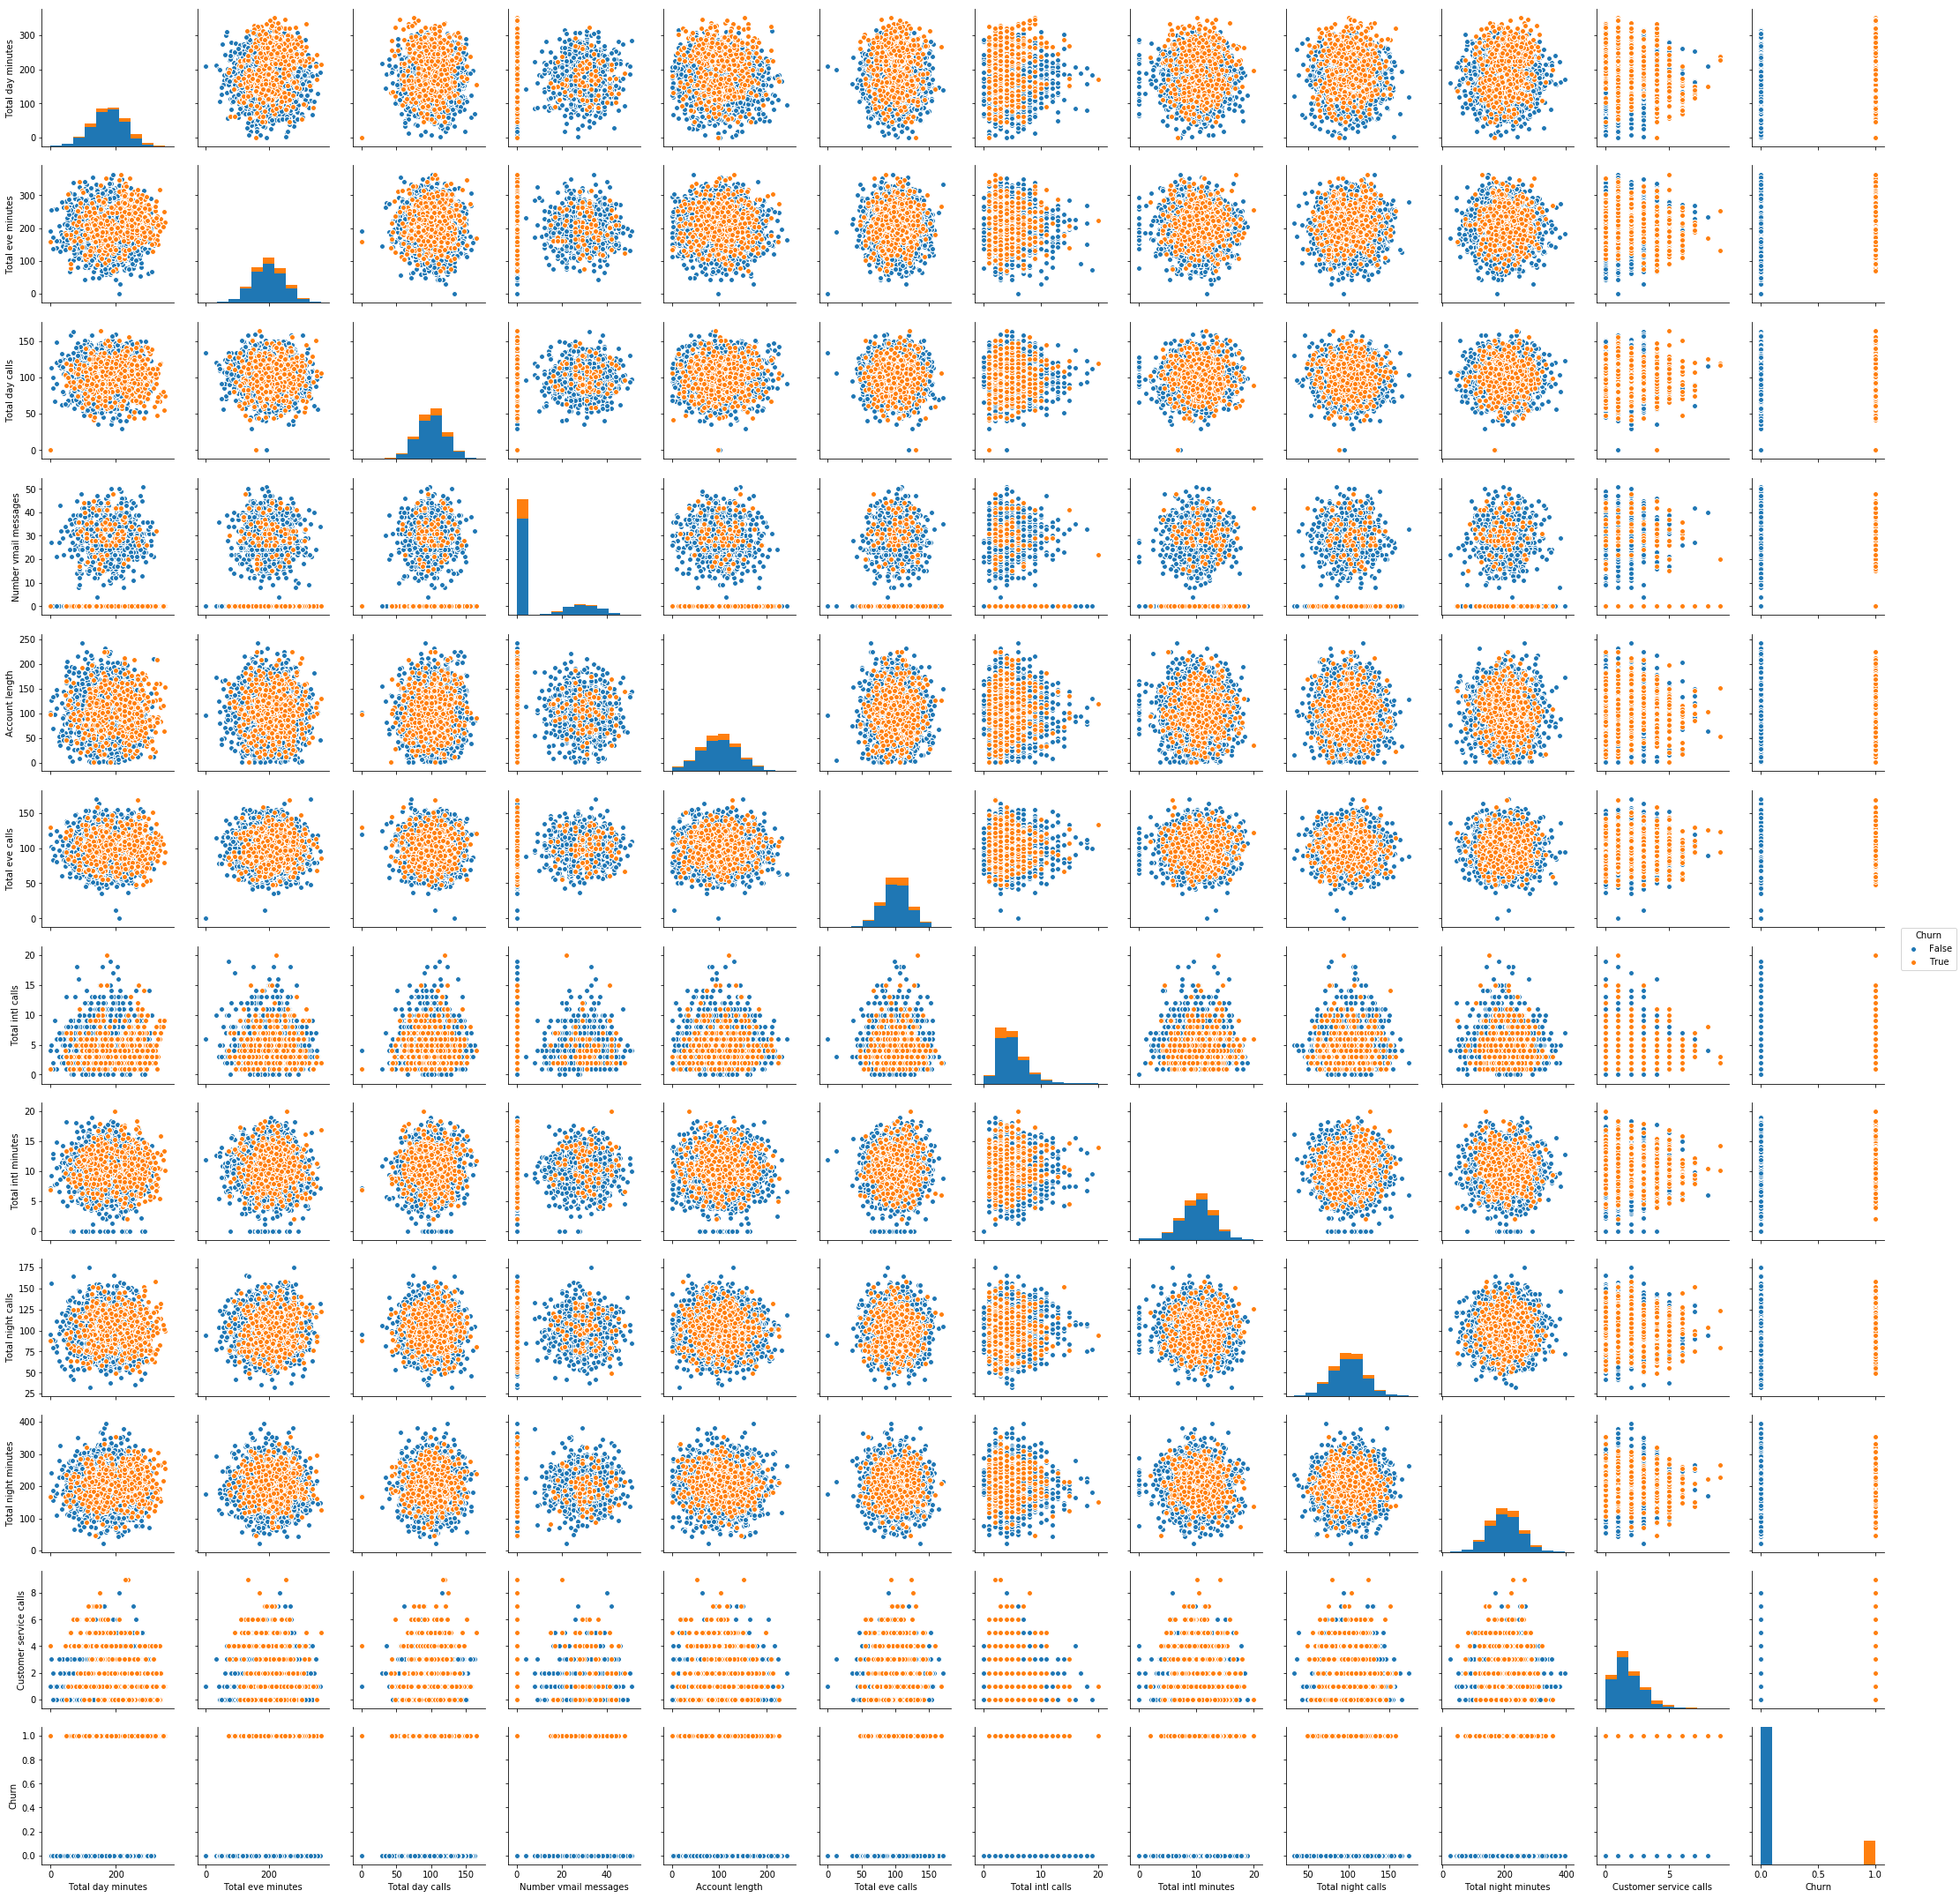

In [33]:
sns.pairplot(df[features + ['Churn']], hue='Churn');